# **Model Klasifikasi untuk Deteksi Penyakit Hati pada Pasien di India**

## Import libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## **Pendahuluan**

### Latar Belakang

Penyakit hati (liver) merupakan salah satu masalah kesehatan yang signifikan di seluruh dunia. Di India, prevalensi penyakit hati semakin meningkat, baik akibat faktor genetik, pola makan yang tidak sehat, konsumsi alkohol yang berlebihan, atau infeksi seperti hepatitis. Dataset ILPD (Indian Liver Patient Dataset) adalah kumpulan data yang berisi informasi medis pasien terkait penyakit hati. Dataset ini meliputi berbagai parameter kesehatan, seperti usia, jenis kelamin, jumlah bilirubin, SGPT, SGOT, albumin, dan klasifikasi apakah seseorang menderita penyakit hati atau tidak.

Penelitian ini bertujuan untuk menganalisis dan memprediksi kemungkinan seseorang menderita penyakit hati dengan menggunakan metode pembelajaran mesin, sehingga dapat memberikan deteksi dini dan rekomendasi medis yang lebih cepat dan lebih tepat.

### Tujuan


*   Mengembangkan model pembelajaran mesin untuk memprediksi apakah seorang pasien menderita penyakit hati berdasarkan atribut medis yang ada dalam dataset.
*   Mengidentifikasi faktor-faktor yang paling berpengaruh terhadap kemungkinan seseorang menderita penyakit hati.
*   Menerapkan model prediksi untuk membantu tenaga medis dalam melakukan diagnosa secara lebih cepat dan efisien.



### Permasalahan



*   Dataset ini mungkin memiliki jumlah data yang tidak seimbang antara pasien yang menderita penyakit hati dan yang tidak. Ini dapat menyebabkan model menjadi bias dan mengurangi akurasi prediksi untuk kelas minoritas.
*   Data yang tidak lengkap atau memiliki noise dapat mengganggu proses analisis dan pemodelan, sehingga perlu dilakukan pembersihan dan pra-pemrosesan data.
*   Jika model terlalu kompleks, ada kemungkinan model akan overfit pada data pelatihan, sehingga tidak dapat memprediksi dengan baik pada data baru.



### Memahami Bisnis

Penyakit hati adalah salah satu penyebab utama kematian di dunia, dan deteksi dini dapat membantu dalam pengobatan yang lebih efektif dan mengurangi biaya perawatan kesehatan jangka panjang. Dengan membangun sistem prediksi berbasis data, rumah sakit atau klinik dapat:

*  Sistem yang dapat memberikan rekomendasi awal tentang kemungkinan penyakit hati pada pasien dapat mempercepat proses pemeriksaan medis.
*  Dengan memiliki sistem prediksi, tenaga medis dapat lebih fokus pada pasien yang lebih berisiko, mengoptimalkan penggunaan waktu dan sumber daya di rumah sakit.

## **Metode Penelitian**

import library yang dibutuhkan

In [ ]:
import pandas as pd

### **Pengumpulan Data**

Data yang saya gunakan dari website uciml dataset, dimana sumber pengumpulan dari data berada di Timur Laut Andhra Pradesh, India. Data ini  ini berisi catatan dari 416 pasien yang didiagnosis dengan penyakit hati dan 167 pasien tanpa penyakit hati. Informasi ini terkandung dalam label kelas bernama 'Selector'. Ada 10 variabel per pasien: usia, jenis kelamin, Bilirubin total, Bilirubin langsung, protein total, albumin, rasio A/G, SGPT, SGOT, dan Alkphos. Dari 583 catatan pasien, 441 adalah laki-laki, dan 142 adalah perempuan.

menggunakan library uci ml untuk mengambil data

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
df_main = fetch_ucirepo(id=225)

# data (as pandas dataframes)
X = df_main.data.features
y = df_main.data.targets



# Concatenate features and targets horizontally
df_main = pd.concat([X, y], axis=1)

df_main

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


**identifikasi data**

In [ ]:
df_main.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Konsep macam-macam tipe data

Atribut adalah bidang data, yang mewakili karakteristik atau fitur objek data. Hal ini berarti atribut, dimensi, fitur, dan variabel yang sering digunakan secara bergantian dalam literatur.


* Nominal attributes berarti atribut yang nilainya berupa simbol atau nama yang merepresentasikan kategori atau status tertentu tanpa urutan yang berarti.
* Binary attributes berarti atribut nominal dengan dua kategori atau status, biasanya 0 dan 1.
* Ordinal attributes berarti atribut yang nilainya memiliki urutan yang berarti atau ranking, namun selisih antara nilai-nilai tersebut tidak diketahui.
* Numeric attributes berarti atribut kuantitatif yang diukur dalam nilai integer atau real.



dan mengamati secara langsung berdasarkan informasi metadata dan informasi variabel diatas, dapat disimpulkan bahwa :



* Age : tipe data numeric, Umur pasien dalam satuan tahun. Jika usia pasien lebih dari 89 tahun, maka pasien tersebut dicatat dengan usia "90". Fitur ini memberikan informasi tentang usia pasien yang bisa digunakan untuk analisis lebih lanjut dalam konteks pengaruh usia terhadap penyakit atau kondisi tertentu.
* Gender : tipe data binary, Jenis kelamin pasien. menggunakan nilai "Male" dan "Female". Fitur ini digunakan untuk membedakan jenis kelamin pasien dan menganalisis apakah ada perbedaan antara jenis kelamin dalam kondisi medis tertentu.
* TB(Total Bilirubin) : tipe continuous, Total Bilirubin dalam darah pasien. Bilirubin adalah zat yang dihasilkan oleh pemecahan sel darah merah yang sudah tua. Nilai ini digunakan untuk mendiagnosis masalah hati, seperti penyakit hati atau gangguan hati lainnya.
* DT(Direct Bilirubin) : tipe continuous, Bilirubin langsung, yang merupakan bagian dari total bilirubin yang lebih langsung terkait dengan hati. Merupakan indikator penting dalam mengevaluasi gangguan hati dan saluran empedu.
* Alkphos(Alkaline Phosphotase) : tipe numeric, Alkaline Phosphotase (ALP) adalah enzim yang ditemukan di banyak jaringan tubuh, terutama hati, tulang, ginjal, dan saluran empedu. Kadar ALP yang tinggi bisa menandakan masalah hati atau tulang.
* Sgpt(Alamine Aminotransferase): tipe numeric, Alanine aminotransferase (ALT) adalah enzim yang ditemukan dalam hati.
Pengukuran ALT digunakan untuk mengidentifikasi kerusakan atau peradangan pada hati. Kadar yang tinggi dapat menunjukkan adanya gangguan hati.
* Sgot(Aspartate Aminotransferase) : tipe numeric, Aspartate aminotransferase (AST) adalah enzim yang juga terdapat pada hati dan beberapa organ lainnya. Kadar AST digunakan untuk mendeteksi kerusakan hati, meskipun AST juga dapat dipengaruhi oleh kondisi lain seperti gangguan otot.
* TP(Total Proteins) : Total kadar protein dalam darah pasien. Protein dalam darah meliputi albumin dan globulin, yang memainkan peran penting dalam fungsi tubuh. Nilai ini digunakan untuk mengevaluasi kesehatan hati, ginjal, dan fungsi metabolisme.
* ALB(Albumin) : Albumin adalah jenis protein utama yang terdapat dalam darah, diproduksi oleh hati. Kadar albumin yang rendah dapat menunjukkan masalah pada hati, ginjal, atau kondisi malnutrisi.
* A/G Ratio(Albumin and Globulin Ratio) : Rasio antara kadar albumin dan globulin dalam darah. Rasio ini dapat digunakan untuk menilai keseimbangan antara dua jenis protein dalam tubuh. Perubahan rasio ini dapat mengindikasikan adanya masalah medis seperti penyakit ginjal, infeksi, atau penyakit hati.
* **Selector** : tipe binary, data ini menjadi target untuk klasifikasi yang menunjukkan status atau kondisi akhir dari pasien, apakah memiliki penyakit tertentu atau tidak.



#### **tabel distribusi**

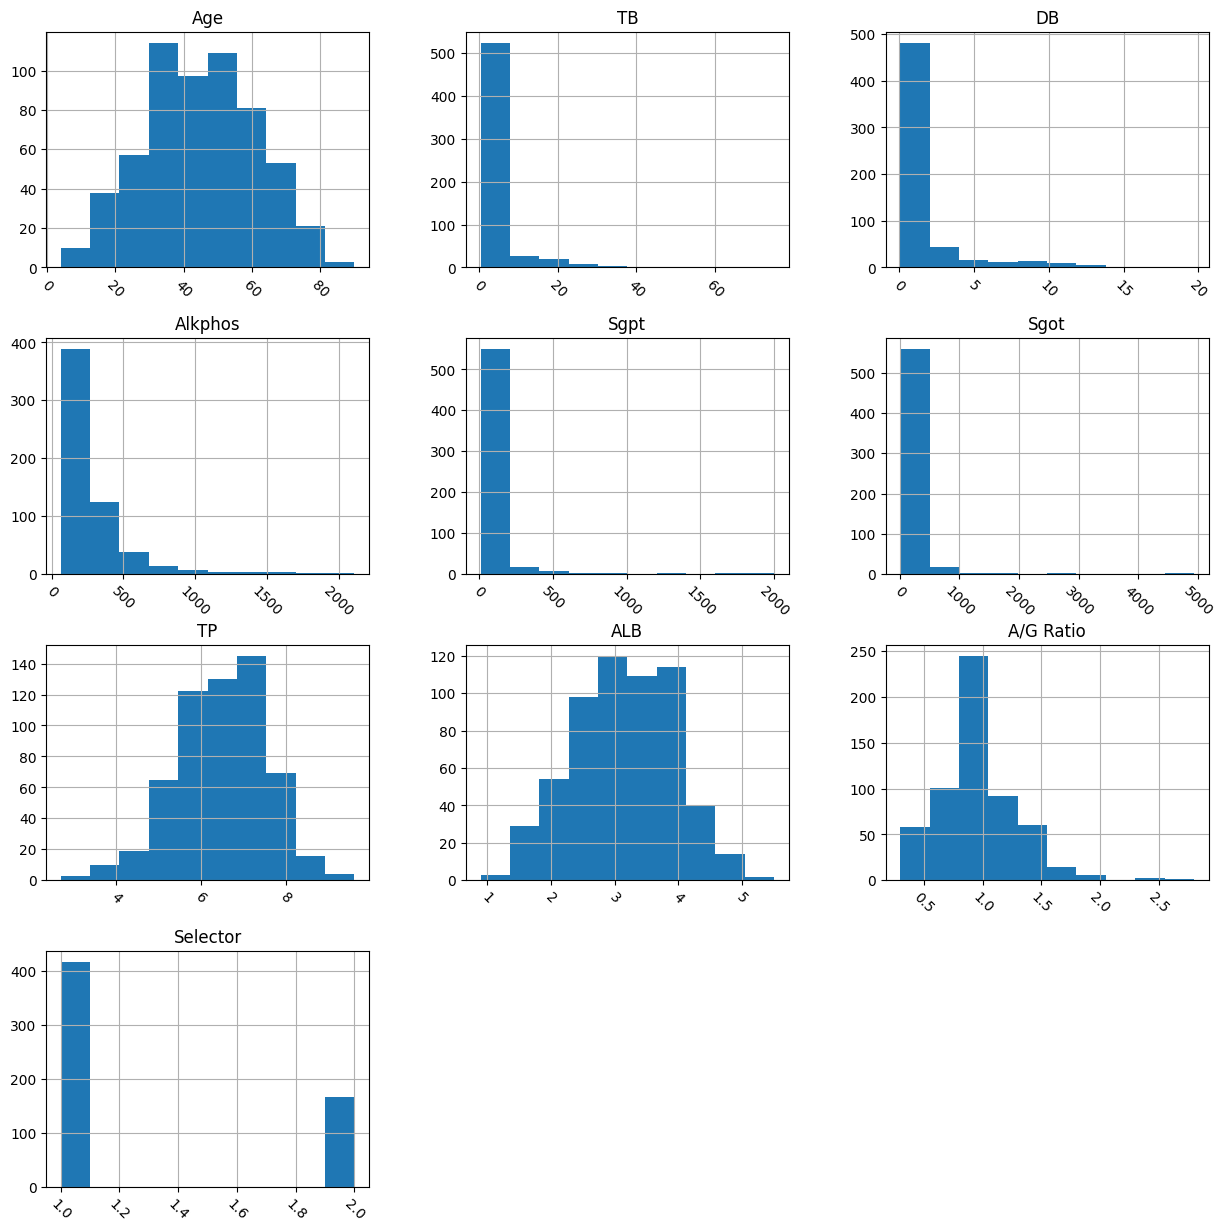

In [ ]:
df_main.hist(figsize=(15,15), xrot=-45,bins=10)
plt.show()

encode untuk gender

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_main['Gender'] = le.fit_transform(df_main['Gender'])
df_main.Gender.head()

,Gender
0,0
1,1
2,1
3,1
4,1


### **Preprocessing Data**

#### missing values

kode untuk cek missing values

In [ ]:
df_main.isnull().sum()

,0
Age,0
Gender,0
TB,0
DB,0
Alkphos,0
Sgpt,0
Sgot,0
TP,0
ALB,0
A/G Ratio,4


dari kode diatas diketahui pada kolom A/G Ratio terdapat missing values, maka haru dilakukan preprocessing yaitu mengisinya menggunakan nilai mean dari kolom tersebut

In [ ]:
df_main['A/G Ratio'].fillna(df_main['A/G Ratio'].mean(), inplace=True)


<ipython-input-502-8787d5a7f3ea>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_main['A/G Ratio'].fillna(df_main['A/G Ratio'].mean(), inplace=True)


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    int64  
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  583 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


dapat dilihat bahwa kolom A/G Ratio sudah tidak memiliki missing values

#### korelasi pada data

In [ ]:
df_main.corr().style.background_gradient(cmap='viridis')

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
TB,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
DB,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkphos,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Sgpt,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Sgot,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
TP,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
ALB,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
A/G Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


dari nilai korelasi diatas dapat dilihat bahwa ada korelasi yang kuat antara

* DB(direct bilirubin) & TB(total bilirubin)
* Sgot(aspartate aminotransferase) & Sgpt(alamine aminotransferase)
* TP(total protiens) & ALB(albumin)
* A/G Ratio(albumin and globulin ratio) & ALB(albumin)

karena itu kita akan menghapus beberapa fitur karena fitur harus independen

In [ ]:
dfs = df_main.copy()
dfs = dfs.drop(['DB', 'Sgot', 'TP', 'ALB'], axis=1)
dfs

,Age,Gender,TB,Alkphos,Sgpt,A/G Ratio,Selector
0,65,0,0.7,187,16,0.90,1
1,62,1,10.9,699,64,0.74,1
2,62,1,7.3,490,60,0.89,1
3,58,1,1.0,182,14,1.00,1
4,72,1,3.9,195,27,0.40,1
...,...,...,...,...,...,...,...
578,60,1,0.5,500,20,0.37,2
579,40,1,0.6,98,35,1.10,1
580,52,1,0.8,245,48,1.00,1
581,31,1,1.3,184,29,1.00,1


In [ ]:
df_cleaned = df_main.copy()
df_cleaned = df_cleaned.drop(['DB', 'Sgot', 'TP', 'ALB'], axis=1)


In [ ]:
df_cleaned.head()

,Age,Gender,TB,Alkphos,Sgpt,A/G Ratio,Selector
578,0.942997,0.567446,-0.451114,0.862786,-0.332743,-1.813419,2
579,-0.293407,0.567446,-0.434996,-0.793378,-0.250535,0.480601,1
580,0.448435,0.567446,-0.402760,-0.187766,-0.179288,0.166351,1
581,-0.849789,0.567446,-0.322169,-0.439074,-0.283418,0.166351,1
582,-0.417048,0.567446,-0.370523,-0.307240,-0.327263,1.737598,2


#### Outlier dan transformasi data

Sekarang periksa data menggunakan boxplot dan distplot untuk melihat fitur apa yang miring, berapa rasio outlier, membantu, dll.

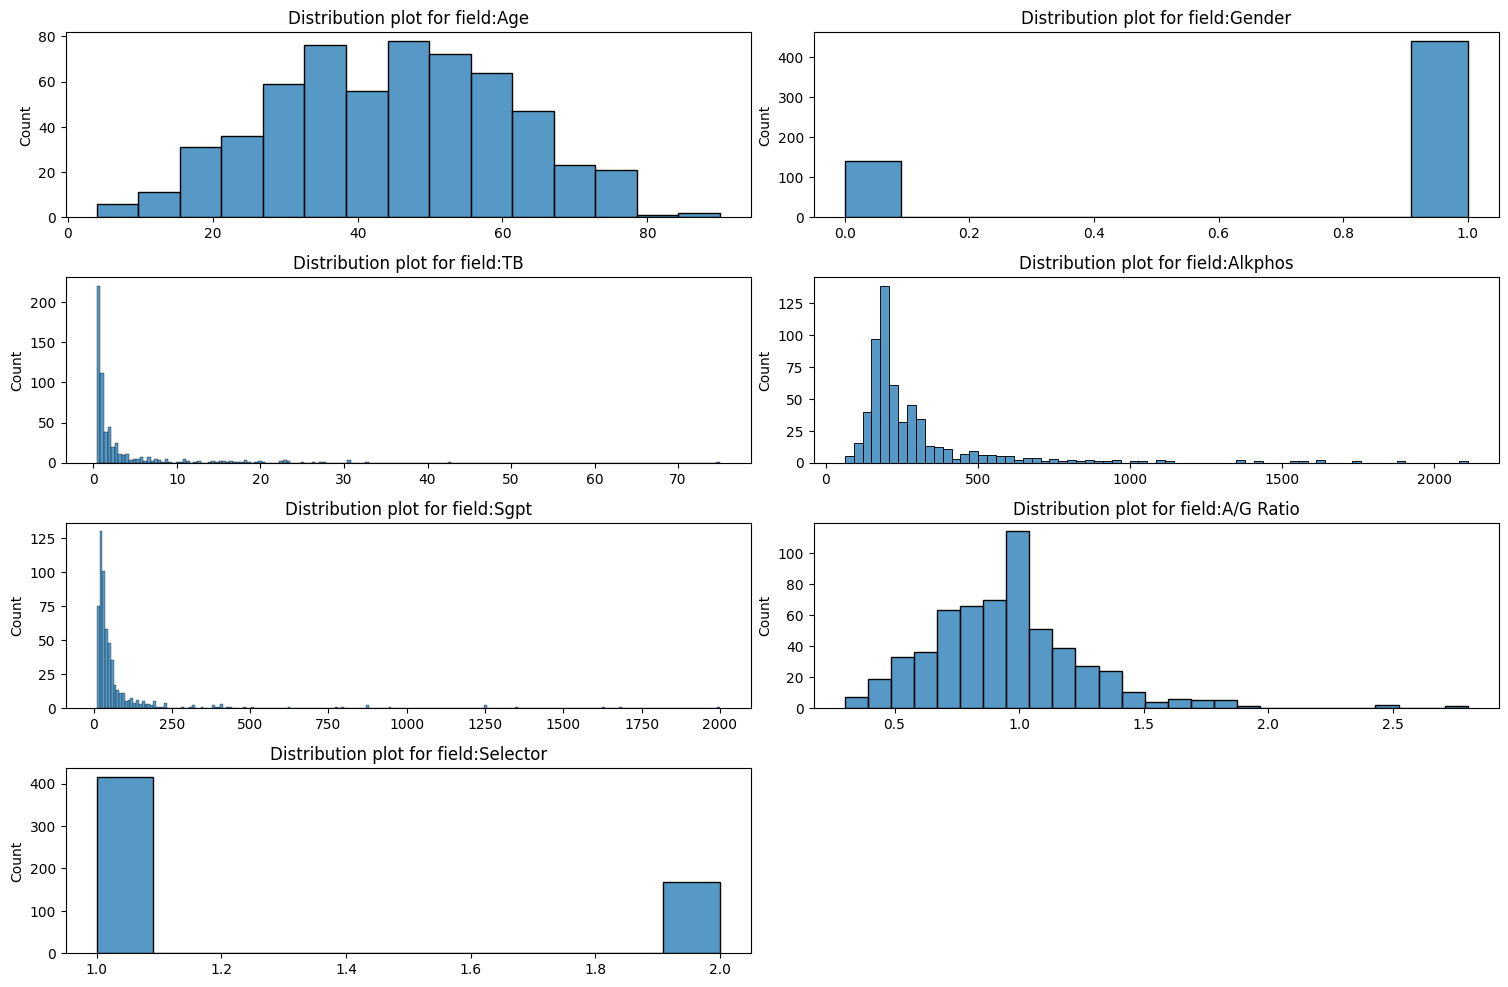

In [ ]:
plt.figure(figsize=(15, 12))

for i, c in enumerate(df_cleaned.select_dtypes(include='number').columns):
    plt.subplot(5,2,i+1)
    sns.histplot(df_cleaned[c])
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

dari visualisasi diatas kita dapat melihat bahwa


* dataset sedikit tidak seimbang
* fitur yang sedikit miring: A/G Ratio
* fitur sangat miring: TB, DB, Alkphos, Sgpt

Kita akan memperbaiki nilai-nilai ini menggunakan transformasi log1p dan kemudian menskalakan variabel menggunakan RobustScaler karena cara ini bagus untuk data dengan outlier.

langkah pertama yaitu menyimpan fitur yang miring

In [ ]:
skewed_cols = ['A/G Ratio','TB', 'Alkphos', 'Sgpt']

In [ ]:
# for c in skewed_cols:
#     df_cleaned[c] = df_cleaned[c].apply('log1p')

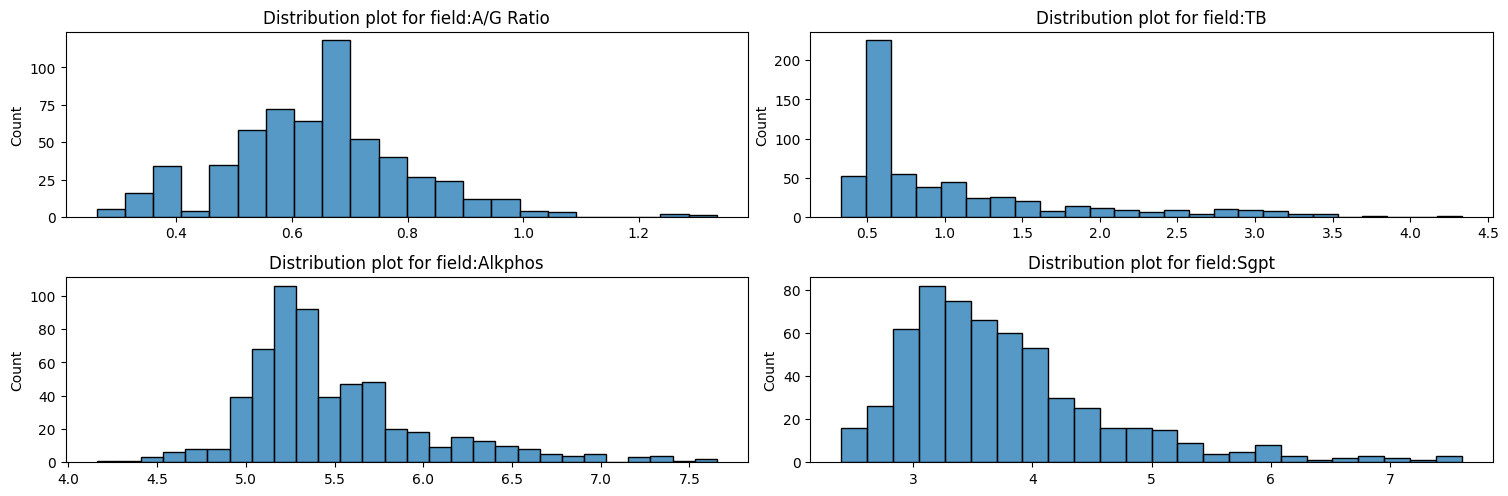

In [ ]:
plt.figure(figsize=(15, 12))

for i, c in enumerate(skewed_cols):
    plt.subplot(5,2,i+1)
    sns.histplot(df_cleaned[c].apply(np.log1p))
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

dapat dilihat setelah melakukan transformasi, data hanya terlihat sedikit miring, tetapi proses ini merubah keaslian data

#### scaling

setelah melakukan preprocessing pada outlier, selanjutnya kita akan melakukan melakukan scaling

melakukan RobustScaler pada data

In [ ]:
from sklearn.preprocessing import StandardScaler

rs = StandardScaler()
for c in df_cleaned[['Age', 'Gender', 'TB', 'Alkphos', 'Sgpt', 'A/G Ratio']].columns:
    df_cleaned[c] = rs.fit_transform(df_cleaned[c].values.reshape(-1, 1))
df_cleaned.head()

,Age,Gender,TB,Alkphos,Sgpt,A/G Ratio,Selector
0,1.252098,-1.762281,-0.418878,-0.426715,-0.354665,-0.147898,1
1,1.066637,0.567446,1.225171,1.682629,-0.091599,-0.650697,1
2,1.066637,0.567446,0.644919,0.821588,-0.113522,-0.179323,1
3,0.819356,0.567446,-0.370523,-0.447314,-0.365626,0.166351,1
4,1.684839,0.567446,0.096902,-0.393756,-0.294379,-1.719144,1


#### balance data

In [ ]:
from sklearn.utils import resample
df_cleaned.Selector.value_counts()

,count
Selector,
1,416
2,167


In [ ]:
# Split data on majority and minority.. minority is Selector == 2
minority = df_cleaned[df_cleaned.Selector==2]
majority = df_cleaned[df_cleaned.Selector==1]

print('Minority size:', minority.shape)
print('Majority size:', majority.shape)

Minority size: (167, 7)
Majority size: (416, 7)


In [ ]:
# choosing upsample as even now we do not have too much data
minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
print('Minority upsampled size:', minority_upsample.shape)

Minority upsampled size: (416, 7)


In [ ]:
# merge majority with upsampled minority
df = pd.concat([minority_upsample, majority], axis=0)

#### membagi dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Selector', axis=1), df['Selector'], test_size=0.30, random_state=123)

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (582, 6)
Test values shape: (250, 6)
Train target shape: (582,)
Test target shape: (250,)


### **Modelling**

import library yang dibutuhkan untuk proses modelling, untuk proses ini model yang digunakan yaitu :


* Logistik Regression
* SVC
* Random Forest
* XGBoost



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#### Logistic Regression

In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_train_hat = lr_model.predict(X_train)
y_test_hat = lr_model.predict(X_test)

print(lr_model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

LogisticRegression()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.79      0.60      0.68       297
           2       0.66      0.84      0.74       285

    accuracy                           0.71       582
   macro avg       0.73      0.72      0.71       582
weighted avg       0.73      0.71      0.71       582

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.78      0.49      0.60       119
           2       0.65      0.88      0.75       131

    accuracy                           0.69       250
   macro avg       0.72      0.68      0.68       250
weighted avg       0.72      0.69      0.68       250

Roc_auc score
-------------------------------------------------------
0.6826287767015203

Confusion matrix
-------------------------------------------------------
[[ 58  61]
 [ 1

#### Support Vector Machines

In [ ]:
# Support Vector Machines
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_train_hat = svm_model.predict(X_train)
y_test_hat = svm_model.predict(X_test)

print(svm_model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

SVC()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.82      0.59      0.69       297
           2       0.67      0.87      0.76       285

    accuracy                           0.73       582
   macro avg       0.75      0.73      0.72       582
weighted avg       0.75      0.73      0.72       582

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.82      0.47      0.60       119
           2       0.65      0.91      0.76       131

    accuracy                           0.70       250
   macro avg       0.74      0.69      0.68       250
weighted avg       0.73      0.70      0.68       250

Roc_auc score
-------------------------------------------------------
0.6894925909295015

Confusion matrix
-------------------------------------------------------
[[ 56  63]
 [ 12 119]]


#### Random Forest

In [ ]:
# Random Forest
rm_model = RandomForestClassifier(n_estimators=100,random_state=42)
rm_model.fit(X_train, y_train)
y_train_hat = rm_model.predict(X_train)
y_test_hat = rm_model.predict(X_test)

print(rm_model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

RandomForestClassifier(random_state=42)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       297
           2       1.00      1.00      1.00       285

    accuracy                           1.00       582
   macro avg       1.00      1.00      1.00       582
weighted avg       1.00      1.00      1.00       582

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.93      0.79      0.85       119
           2       0.83      0.95      0.89       131

    accuracy                           0.87       250
   macro avg       0.88      0.87      0.87       250
weighted avg       0.88      0.87      0.87       250

Roc_auc score
-------------------------------------------------------
0.8682404259413689

Confusion matrix
----------------------------------------------------

In [ ]:
# from xgboost import XGBClassifier

# xgb_model = XGBClassifier(random_state=123)
# xgb_model.fit(X_train, y_train)
# y_train_hat = xgb_model.predict(X_train)
# y_test_hat = xgb_model.predict(X_test)

# print(xgb_model)
# print('Train performance')
# print('-------------------------------------------------------')
# print(classification_report(y_train, y_train_hat))

# print('Test performance')
# print('-------------------------------------------------------')
# print(classification_report(y_test, y_test_hat))

# print('Roc_auc score')
# print('-------------------------------------------------------')
# print(roc_auc_score(y_test, y_test_hat))
# print('')

# print('Confusion matrix')
# print('-------------------------------------------------------')
# print(confusion_matrix(y_test, y_test_hat))

Test Performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.93      0.79      0.85       119
           2       0.83      0.95      0.89       131

    accuracy                           0.87       250
   macro avg       0.88      0.87      0.87       250
weighted avg       0.88      0.87      0.87       250

ROC AUC Score: 0.8682

Confusion Matrix:
[[ 94  25]
 [  7 124]]


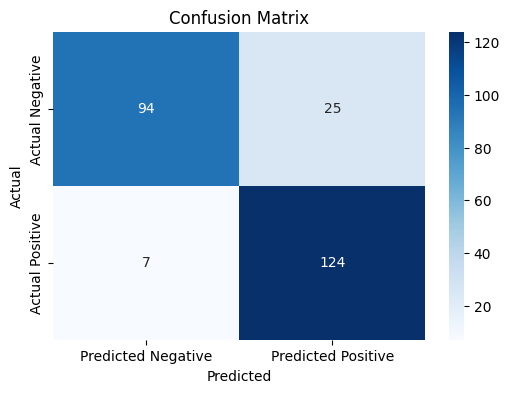


Hasil Prediksi Selector pada Data Test:
     Actual Selector  Predicted Selector
18                 1                   1
46                 1                   2
176                1                   1
383                2                   2
480                2                   2


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Misalkan model yang sudah dilatih sebelumnya:
# model = XGBClassifier(random_state=123)
# model.fit(X_train, y_train)  # Pastikan model sudah dilatih sebelumnya

# Prediksi pada data test (X_test dan y_test sudah ada)
y_test_hat = rm_model.predict(X_test)  # Memastikan bahwa X_test adalah data test yang sudah dipersiapkan

# Menampilkan performa model pada data test
print("Test Performance")
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

# Menghitung ROC AUC score untuk data test
roc_auc = roc_auc_score(y_test, y_test_hat)
print(f"ROC AUC Score: {roc_auc:.4f}")
print('')

# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_hat)
print('Confusion Matrix:')
print(conf_matrix)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Menampilkan hasil prediksi beserta target 'Selector'
# Membuat DataFrame untuk melihat hasil prediksi beserta target asli
df_results = pd.DataFrame({
    'Actual Selector': y_test,  # Nilai asli target 'Selector'
    'Predicted Selector': y_test_hat  # Hasil prediksi dari model
})

print("\nHasil Prediksi Selector pada Data Test:")
print(df_results.head())


In [ ]:
X_test

,Age,Gender,TB,Alkphos,Sgpt,A/G Ratio
18,-0.293407,-1.762281,-0.386642,0.009985,0.829132,-0.462147
46,-1.467991,0.567446,0.096902,-0.579148,-0.245055,1.234799
176,0.633896,0.567446,-0.402760,0.788629,0.171467,-0.462147
383,0.942997,-1.762281,-0.306051,-0.542070,-0.387549,0.166351
480,-2.333474,0.567446,-0.451114,0.253054,-0.288899,0.480601
...,...,...,...,...,...,...
454,-1.035250,0.567446,-0.434996,-0.542070,-0.360146,0.166351
353,0.201154,-1.762281,-0.306051,1.361283,0.160506,0.480601
199,-2.333474,-1.762281,3.852426,4.653013,3.887275,-1.719144
342,-0.602508,0.567446,-0.402760,-0.381397,-0.245055,1.109099


In [ ]:
df_cleaned.Selector

,Selector
0,1
1,1
2,1
3,1
4,1
...,...
578,2
579,1
580,1
581,1


## **Simpan Model**

### Simpan Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
import pickle

# Misalkan X_train adalah data fitur untuk pelatihan
scaler = StandardScaler()
scaler.fit(X_train)  # Melatih scaler hanya pada X_train

# Simpan scaler ke file
with open('scaler.sav', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Scaler berhasil disimpan sebagai 'scaler.sav'")

Scaler berhasil disimpan sebagai 'scaler.sav'


In [ ]:
# import pickle

# # Simpan scaler ke file
# with open('scaler.sav', 'wb') as scaler_file:
#     pickle.dump(scaler, scaler_file)

# print("Scaler berhasil disimpan sebagai 'scaler.sav'")

Scaler berhasil disimpan sebagai 'scaler.sav'


In [ ]:
# Menyimpan model terbaik ke file
with open('model.sav', 'wb') as model_file:
    pickle.dump(rm_model, model_file)

print("Model terbaik berhasil disimpan sebagai 'model.sav'")

Model terbaik berhasil disimpan sebagai 'model.sav'


## Deployment

https://huggingface.co/spaces/bram4627/klasifikasi_penyakit_liver